In [26]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [31]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


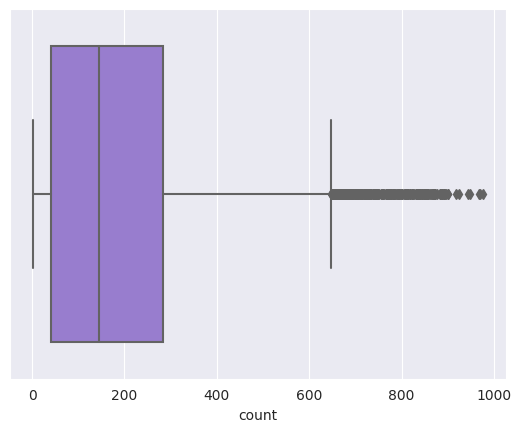

In [32]:
sns.boxplot(x='count',data=train,color='mediumpurple')
plt.show()

<ipython-input-33-808380b18818>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'],bins=100,color='green')


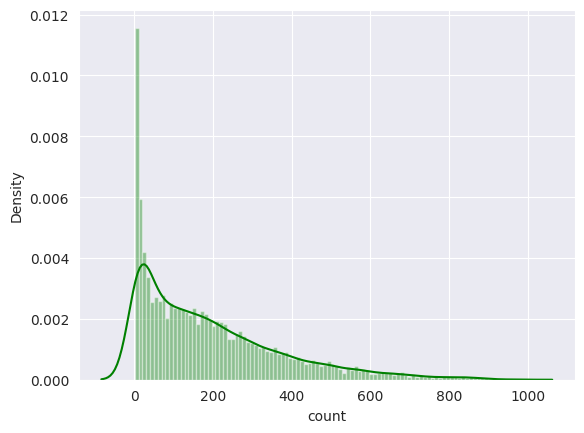

In [33]:
sns.set_style('darkgrid')
sns.distplot(train['count'],bins=100,color='green')
plt.show()

['temp', 'atemp', 'humidity', 'windspeed']


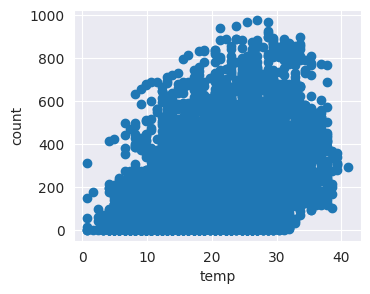

In [34]:
fields=[f for f in train]
fields=fields[5:-3]
print(fields)

fig=plt.figure(figsize=(17,3))

for i,f in enumerate(fields):
  ax=fig.add_subplot(1,4,i+1)
  ax.scatter(train[f],train['count'])
  ax.set_ylabel('count')
  ax.set_xlabel(f)

  plt.show()


[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

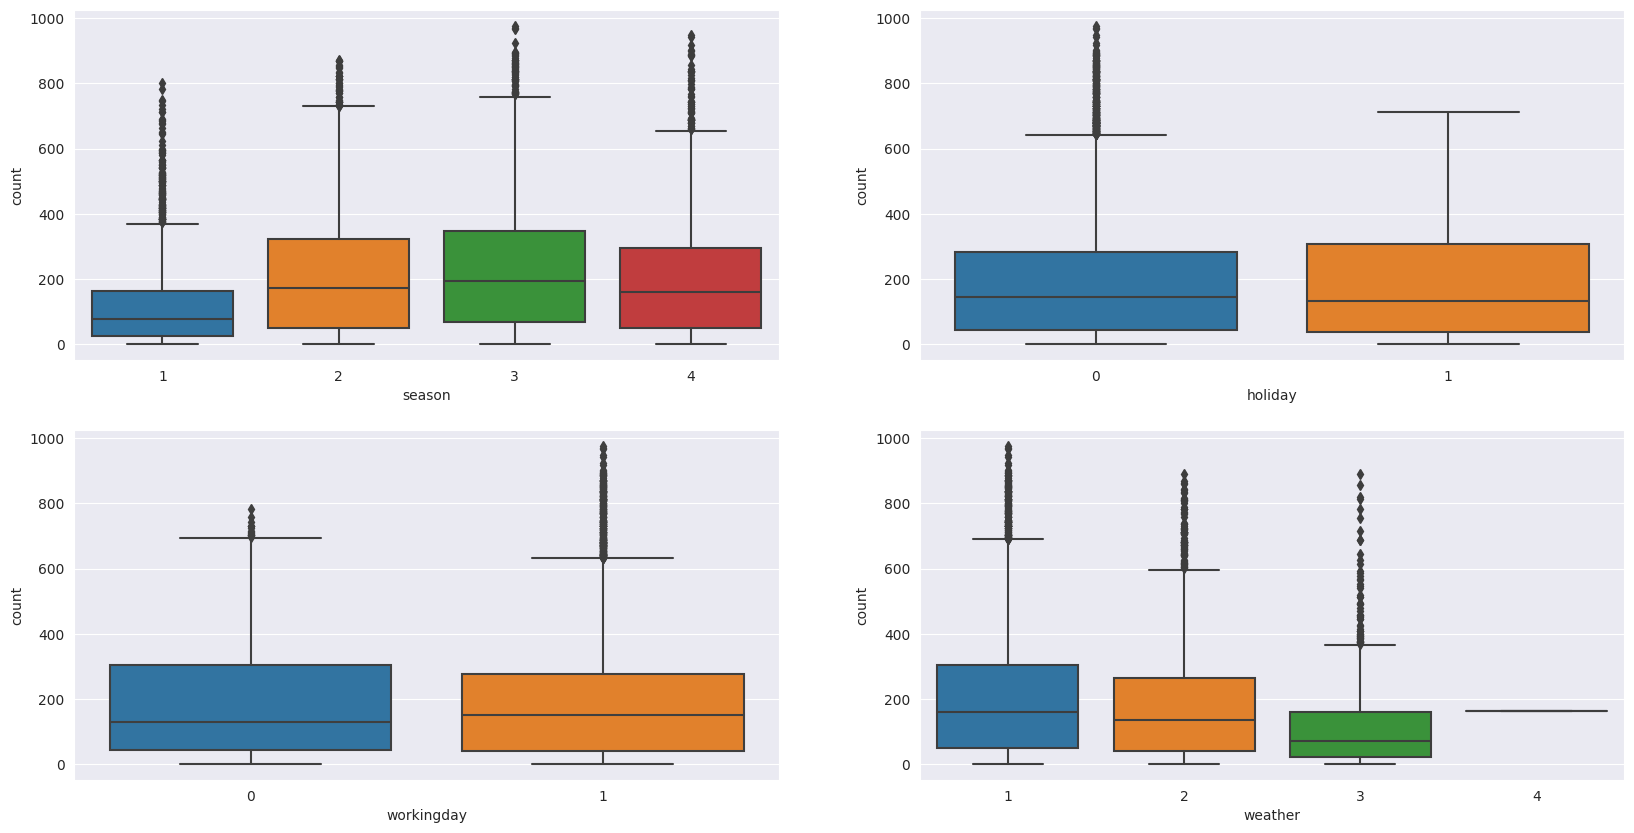

In [35]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=train,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='weather',ax=axes[1][1])

axes[0][0].set(xlabel='season',ylabel='count')
axes[0][1].set(xlabel='holiday',ylabel='count')
axes[1][0].set(xlabel='workingday',ylabel='count')
axes[1][1].set(xlabel='weather',ylabel='count')

<ipython-input-36-112a421656b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr('pearson'),vmin=1,vmax=1,cmap='coolwarm',annot=True,square=True)


<Axes: >

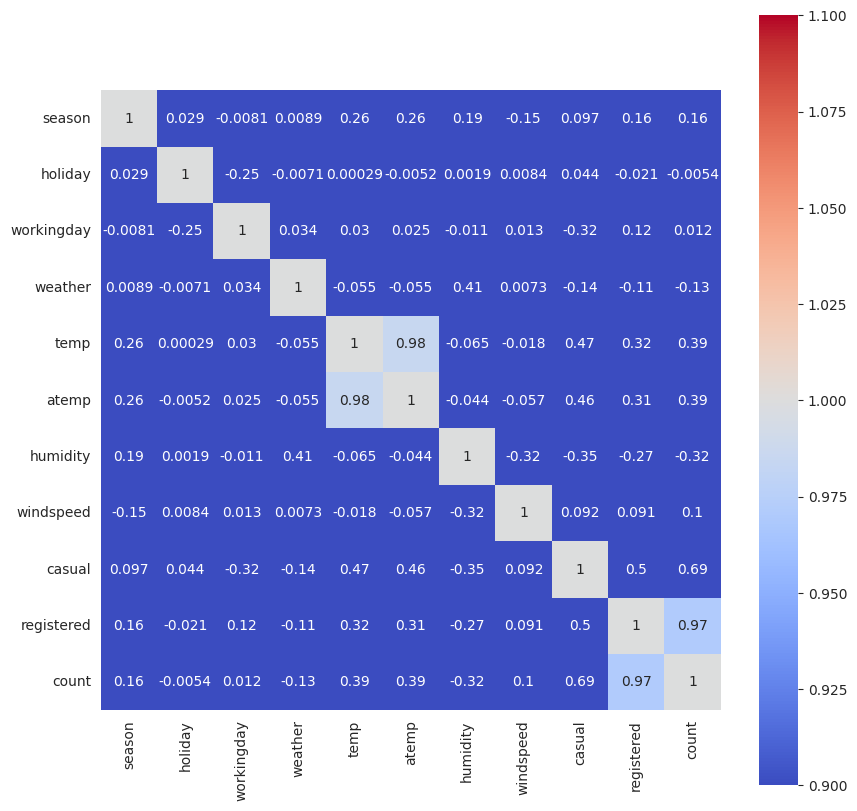

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr('pearson'),vmin=1,vmax=1,cmap='coolwarm',annot=True,square=True)

In [37]:
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [38]:
def split_datetime(df):
  df['year']=df['datetime'].apply(lambda t:t.year)
  df['month']=df['datetime'].apply(lambda t:t.month)
  df['day']=df['datetime'].apply(lambda t:t.day)
  df['dayofweek']=df['datetime'].apply(lambda t:t.dayofweek)
  df['hour']=df['datetime'].apply(lambda t:t.hour)
  df=df.drop(['datetime'],axis=1)
  return df

In [39]:
train=split_datetime(train)
test=split_datetime(test)
train=train.drop(['casual','registered'],axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


<Axes: xlabel='hour', ylabel='count'>

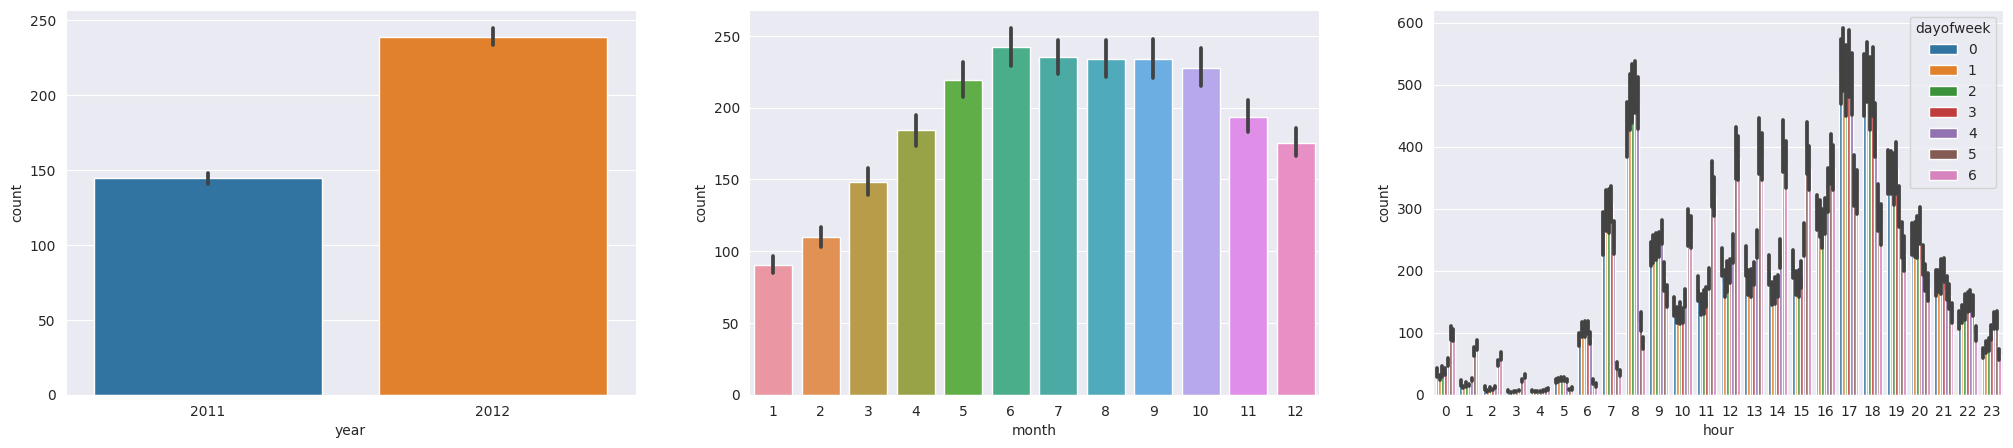

In [40]:
fig,axes=plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25,5)
sns.barplot(data=train,x='year',y='count',ax=axes[0])
sns.barplot(data=train,x='month',y='count',ax=axes[1])
sns.barplot(data=train,x='hour',y='count',ax=axes[2],hue='dayofweek')

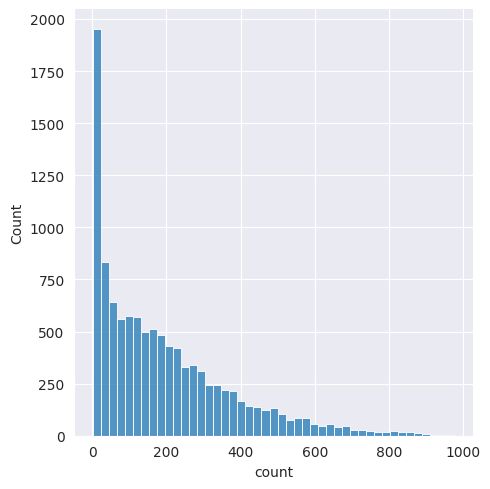

In [41]:
sns.displot(train['count'])

In [42]:
train['count']=np.log1p(train['count'])

<ipython-input-43-9905d7534b29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


<Axes: xlabel='count', ylabel='Density'>

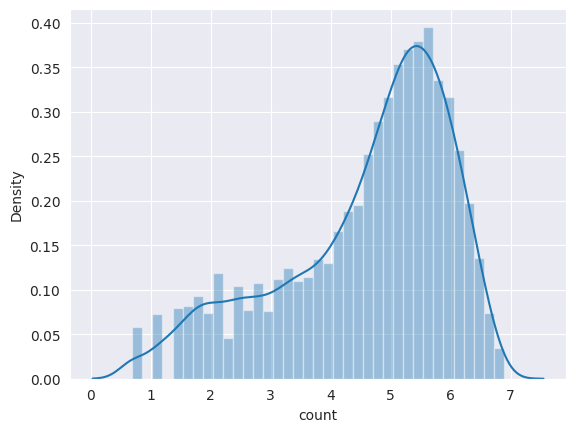

In [43]:
sns.distplot(train['count'])

In [44]:
train=train[np.abs(train['count'])-train['count'].mean() <=(3*train['count'].std())]

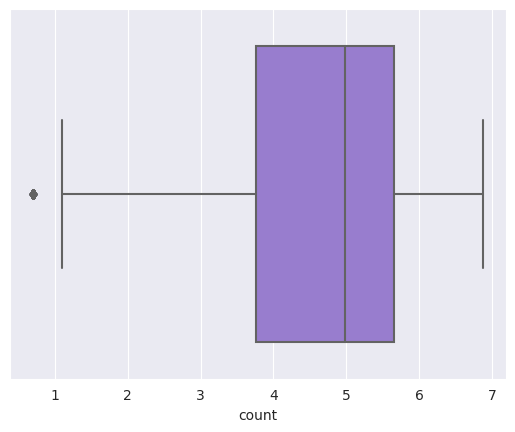

In [45]:
sns.boxplot(x='count',data=train,color='mediumpurple')
plt.show()

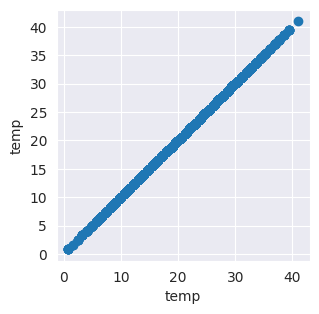

In [46]:
#Eliminate outliners (between correlation)
fig=plt. figure(figsize=(15,15))
for i,f1 in enumerate(fields):
  for j,f2 in enumerate(fields):
    idx=i*len(fields)+i+1
    ax=fig.add_subplot(len(fields),len(fields),idx)
    ax.scatter(train[f1],train[f2])
    ax.set_ylabel(f1)
    ax.set_xlabel(f2)

    plt.show()

In [58]:
drop_idx=train[(train['atemp']>20) & (train['atemp']<40) & (train['temp']>10) & (train['temp']<20)].index
train=train.drop(drop_idx)

In [59]:
# Standard Scaling numeric columns
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
  scalar=MinMaxScaler()
  num_cols=['temp','atemp','humidity','windspeed']
  df[num_cols]=scaler.fit_transform(df[num_cols])
  return df

In [65]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,1,5,4


In [66]:
# Split train & test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop(['count'],axis=1),train['count'],test_size=0.3)

In [86]:
def rmsle(y,pred):
  log_y=np.log1p(y)
  log_pred=np.log1p(pred)
  squared_error=(log_y-log_pred)**2
  rmsle=np.sqrt(np.mean(squared_error))
  return rmsle

In [87]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [90]:
def evaluate(reg_cls,params=None):
  reg=reg_cls()
  if params:
    reg=GridSearchCV(reg,param_grid=params,refit=True)
  reg.fit(x_train,y_train)
  pred=reg.predict(x_test)

  y_test_exp=np.expm1(y_test)
  pred_exp=np.expm1(pred)
  print('\n',reg_cls)
  if params:
    print(rmsle(y_test_exp,pred_exp))
    reg=reg.best_estimator_
  print(rmsle(y_test_exp,pred_exp))
  return reg,pred_exp

In [91]:
lr_reg,pred_lr=evaluate(LinearRegression)
rg_reg,pred_rg=evaluate(Ridge)
ls_reg,pred_ls=evaluate(Lasso)
rf_reg,pred_rf=evaluate(RandomForestRegressor)
gb_reg,pred_gb=evaluate(GradientBoostingRegressor)
xg_reg,pred_xg=evaluate(XGBRegressor)
lg_reg,pred_lg=evaluate(LGBMRegressor)

params={'n_estimators':[100*i for i in range(1,6)]}
xg_reg,pred_xg=evaluate(XGBRegressor,params)
lg_reg,pred_lg=evaluate(LGBMRegressor,params)


 <class 'sklearn.linear_model._base.LinearRegression'>
1.0228121753605044

 <class 'sklearn.linear_model._ridge.Ridge'>
1.0228174566684438

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.0802168915654582

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.3057812743628603

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.37568311779907493

 <class 'xgboost.sklearn.XGBRegressor'>
0.2853764966953674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 6458, number of used features: 13
[LightGBM] [Info] Start training from score 4.625261

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.2882142757044401

 <class 'xgboost.sklearn.XGBRegressor'>
0.2853764966953674
0.2853764966953674
[LightGBM] [Info] Au

In [96]:
def feature_importance(reg):
  plt.figure(figsize=(20,10))
  print(type(reg))
  df=pd.DataFrame(sorted(zip(x_train.columns,reg.feature_importances_)),columns=['features','values'])
  sns.barplot(x='values',y='features',data=df.sort_values(by='values',ascending=False))
  plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


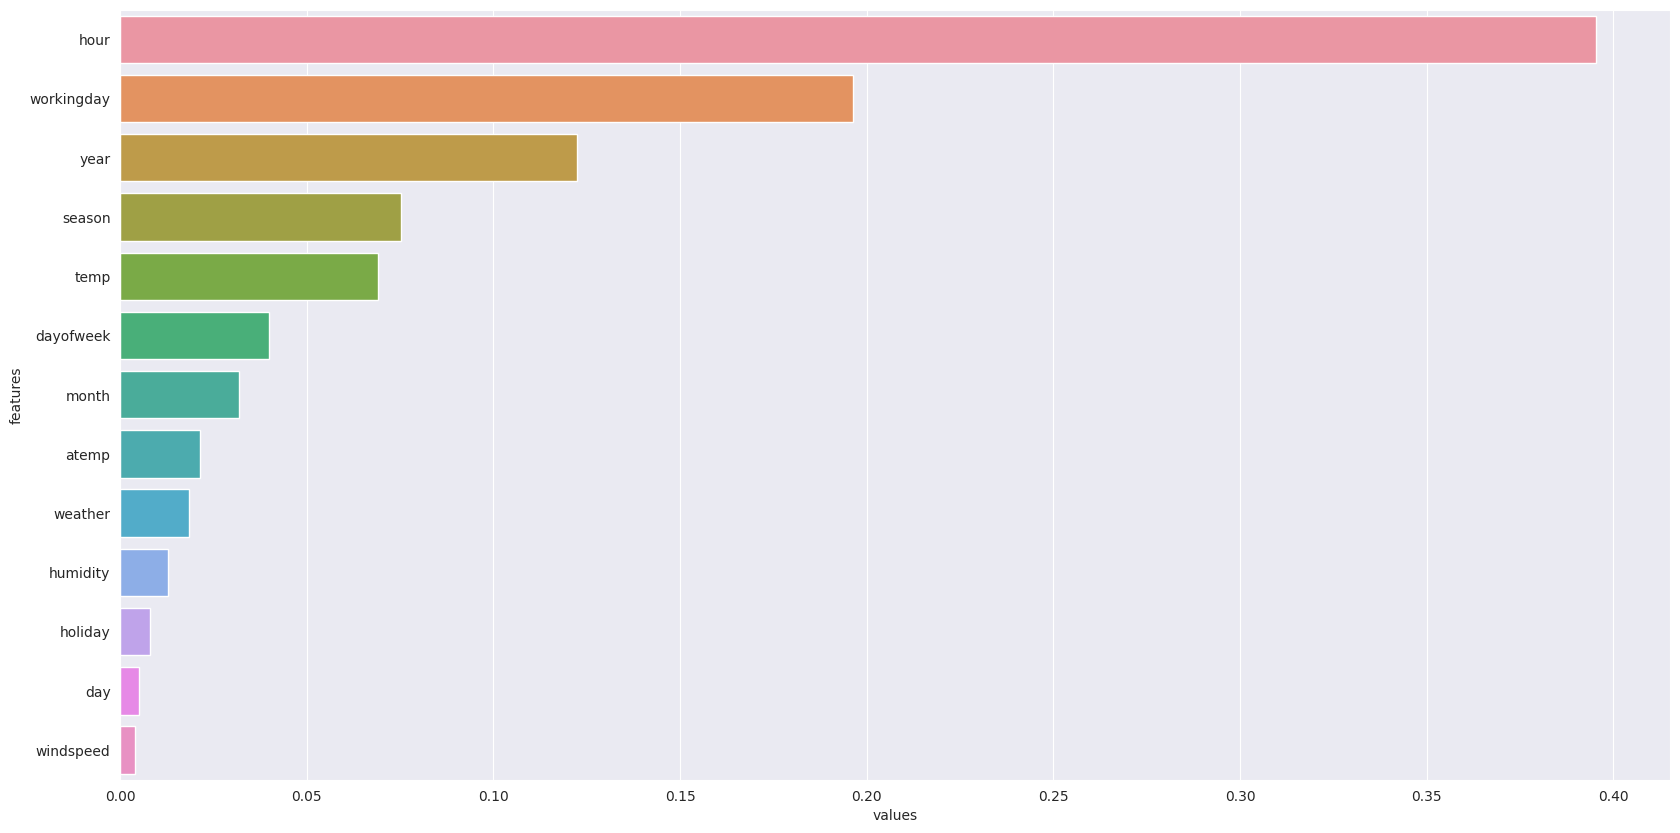

In [97]:
feature_importance(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


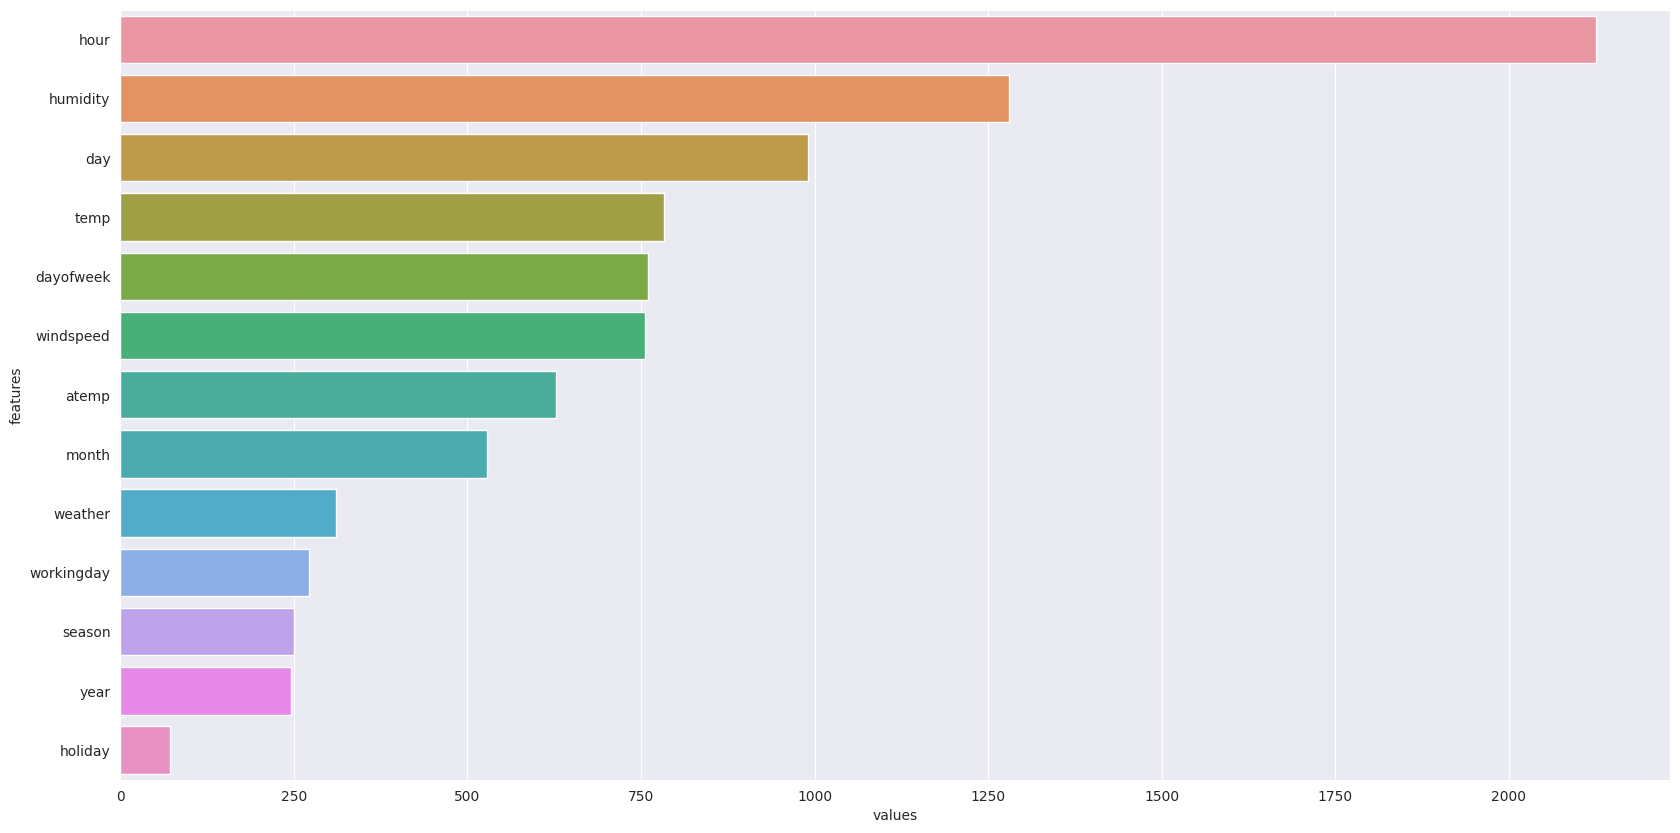

In [98]:
feature_importance(lg_reg)

In [99]:
submission=pd.read_csv('/content/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [103]:
test.shape

(6493, 13)

In [102]:
submission.shape

(6493, 2)

In [104]:
# pred = xg_reg.predict(test)
pred=lg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[ 14.71078965   4.62270125   2.93697602 ... 122.06451084  87.74095057
  46.56872397]


In [106]:
submission.loc[:,'count']=pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,14.710790
1,2011-01-20 01:00:00,4.622701
2,2011-01-20 02:00:00,2.936976
3,2011-01-20 03:00:00,2.702818
4,2011-01-20 04:00:00,2.742028
...,...,...
6488,2012-12-31 19:00:00,213.915754
6489,2012-12-31 20:00:00,164.704091
6490,2012-12-31 21:00:00,122.064511
6491,2012-12-31 22:00:00,87.740951
